In [1]:
from disentangle.core.tiff_reader import load_tiff
# create the crops
fpath = '/group/jug/ashesh/data/diffsplit_BioSR/Microtubules-vs-ER/test/test.tif'
data = load_tiff(fpath)

In [2]:
data.shape

(5, 1004, 1004, 2)

In [3]:
import os
from disentangle.core.tiff_reader import save_tiff

outputfpath = '/group/jug/ashesh/indisplit_segmentation/BioSR/training_small_Ch{}.tiff'
os.makedirs(os.path.dirname(outputfpath), exist_ok=True)


In [8]:
if not os.path.exists(outputfpath.format(0)):
    print('Saving ')
    save_tiff(outputfpath.format(0), data[:4,:512,:512,0])
    save_tiff(outputfpath.format(1), data[:4,:512,:512,1])
    outputevalfpath = '/group/jug/ashesh/indisplit_segmentation/BioSR/eval_Ch{}.tiff'
    save_tiff(outputevalfpath.format(0), data[:,...,0])
    save_tiff(outputevalfpath.format(1), data[:,...,1])

In [30]:
prediction_dict = {
    'indiSplit':{
                 0.9:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.1_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif',
                 0.8:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.2_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif',
                 0.7:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.3_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif',
                 0.6:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.4_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif',
                 0.5:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.5_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif',

    },
    'deepLC': {0.9: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.9_MMSE-10/pred.tif',
               0.8: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.8_MMSE-10/pred.tif',
               0.7: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.7_MMSE-10/pred.tif',
               0.6: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.6_MMSE-10/pred.tif',
               0.5: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.5_MMSE-10/pred.tif',
               0.3: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.3_MMSE-10/pred.tif',
               0.2: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.2_MMSE-10/pred.tif',
               0.1: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.1_MMSE-10/pred.tif',
    },
    'InDI':  {
        0.9: '/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_6/T-0.1_MMSE-10_InferT-0_InferTAgg-0_FixedT-0.5/bt_removed_pred.tif',
        0.8: '/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_6/T-0.2_MMSE-10_InferT-0_InferTAgg-0_FixedT-0.5/bt_removed_pred.tif',
        0.7: '/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_6/T-0.3_MMSE-10_InferT-0_InferTAgg-0_FixedT-0.5/bt_removed_pred.tif',
        0.6: '/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_6/T-0.4_MMSE-10_InferT-0_InferTAgg-0_FixedT-0.5/bt_removed_pred.tif',
        0.5: '/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_6/T-0.5_MMSE-10_InferT-0_InferTAgg-0_FixedT-0.5/bt_removed_pred.tif',
    },
    'denoiSplit': {
        0.9: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.9_MMSE-10/pred.tif',
        0.8: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.8_MMSE-10/pred.tif',
        0.7: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.7_MMSE-10/pred.tif',
        0.3: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.3_MMSE-10/pred.tif',
        0.2: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.2_MMSE-10/pred.tif',
        0.1: '/group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D16-M3-S0-L0_5_T-0.1_MMSE-10/pred.tif',

    }
}

outputdir = '/group/jug/ashesh/indisplit_segmentation/BioSR/'


In [31]:
import os
def get_dir(outputdir, model, ch_idx, mixing_t):
    chstr = f'Ch{ch_idx}'
    return os.path.join(outputdir, model,str(mixing_t), chstr)

# save training data.
for model in prediction_dict.keys():
    for mixing_t_tmp in prediction_dict[model].keys():
        model_fpath = prediction_dict[model][mixing_t_tmp]
        pred = load_tiff(model_fpath)
        for ch_idx in [0,1]:
            traindata_ch = pred[:4,:512,:512,ch_idx]
            print(traindata_ch.shape)
            finaldir = get_dir(outputdir, model, ch_idx, mixing_t_tmp)
            os.makedirs(finaldir, exist_ok=True)

            chstr = f'Ch{ch_idx}'
            fpath = os.path.join(finaldir,f'train_{model}_{mixing_t_tmp}_{chstr}.tiff')
            if os.path.exists(fpath):
                continue

            save_tiff(fpath,traindata_ch)
            print('Saved ',fpath)

(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.3/Ch0/train_deepLC_0.3_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.3/Ch1/train_deepLC_0.3_Ch1.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.2/Ch0/train_deepLC_0.2_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.2/Ch1/train_deepLC_0.2_Ch1.tiff
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 512, 512)
(4, 

In [36]:
mixing_t = 0.1


In [37]:
for model in ['indiSplit', 'deepLC', 'InDI', 'denoiSplit']:
    if mixing_t not in prediction_dict[model]:
        continue

    model_fpath = prediction_dict[model][mixing_t]
    pred = load_tiff(model_fpath)
    for ch_idx in [0,1]:
        chstr = f'Ch{ch_idx}'
        finaldir = get_dir(outputdir, model, ch_idx, mixing_t)
        os.makedirs(finaldir, exist_ok=True)
        fpath = os.path.join(finaldir, f'{model}_{mixing_t}_{chstr}.tiff')
        if os.path.exists(fpath):
            continue
    
        print('Saved to ', fpath)
        save_tiff(fpath, pred[...,ch_idx])
        




Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.1/Ch0/deepLC_0.1_Ch0.tiff
Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.1/Ch1/deepLC_0.1_Ch1.tiff


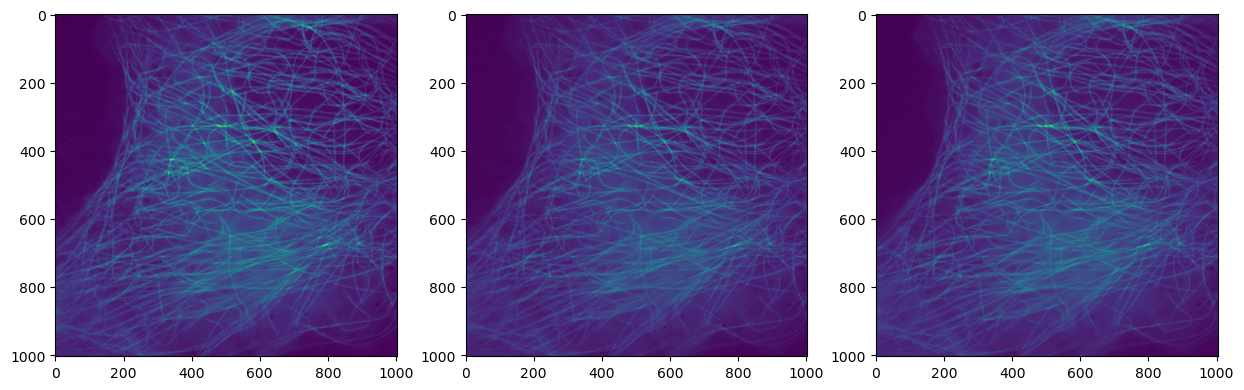

In [26]:
import matplotlib.pyplot as plt 
img0 = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/GT/Ch0/Ch0.tiff')[0]
img1 = load_tiff(f'/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/{str(mixing_t)}/Ch0/Ch0.tiff')[0]
img2 = load_tiff(f'/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/{str(mixing_t)}/Ch0/Ch0.tiff')[0]
_, ax = plt.subplots(figsize=(15,5),ncols=3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img0)

In [ ]:
from scipy.spatial.distance import dice
from disentangle.core.tiff_reader import load_tiff
import numpy as np

gt_seg = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/GT/Ch0/SegmentationsCh0.tif')
indisplit_seg = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch0/SegmentationsCh0.tif')
deepLC_seg = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0/SegmentationsdeepLC09Ch0.tif')

gt_seg.shape, indisplit_seg.shape, deepLC_seg.shape, np.unique(gt_seg)


FileNotFoundError: [Errno 2] No such file or directory: '/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch1/SegmentationsCh1.tif'

In [6]:
from tqdm import tqdm
dice_scores = []

for i in tqdm(range(len(gt_seg))):
    score1 = dice(indisplit_seg[i].reshape(-1,) > 0, gt_seg[i].reshape(-1,) > 0)
    score2 = dice(deepLC_seg[i].reshape(-1,) > 0, gt_seg[i].reshape(-1,) > 0)

    dice_scores.append((score1, score2))

100%|██████████| 5/5 [00:00<00:00, 313.53it/s]


In [7]:
dice_scores

[(0.03652890899556974, 0.06003700962250185),
 (0.03253262227569293, 0.04141284015356711),
 (0.034904649133740494, 0.042763328865095894),
 (0.034888359196380794, 0.048716529330823856),
 (0.03376047631525816, 0.04325774866973684)]

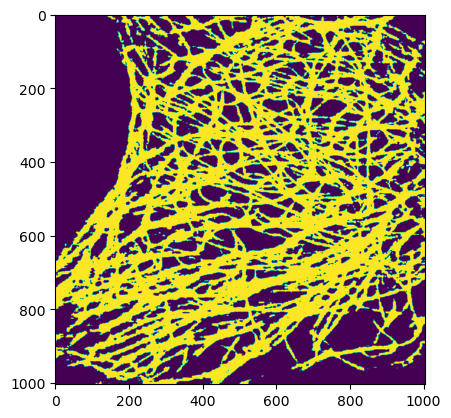

In [10]:
import matplotlib.pyplot as plt
plt.imshow(indisplit_seg[0]* gt_seg[0])

In [21]:
data = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.8/Ch1/prediction/slice_0000_prediction.tiff')

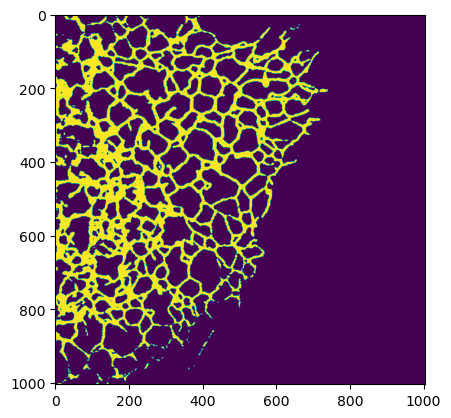

In [23]:
import matplotlib.pyplot as plt
plt.imshow(data)

## Generating the commands to generate segmentation. 

In [44]:
def find_rf(curdir, chidx, t_val, modelname):
    binfiles = [x for x in os.listdir(curdir) if x[-4:] =='.bin']
    assert len(binfiles) == 1, f'{binfiles}, {curdir}'
    fname = binfiles[0]
    assert f'ch{chidx}' in fname.lower(), f'{fname}. {chidx}'
    assert str(int(t_val*10)) in fname, f'{fname}. {t_val}'
    assert modelname.lower() in fname.lower(), f'{fname}. {modelname}'
    return os.path.join(curdir, fname)

rootmodeldir = '/group/jug/ashesh/indisplit_segmentation/BioSR/'
t_list= [0.9]
# t_list= [0.1,0.2,0.3]
ch_idx = 0
models = ['deepLC']
for model in models:
    for t in t_list:
        datadir = os.path.join(rootmodeldir, model, str(t),f'Ch{ch_idx}',f'{model}_{t}_Ch{ch_idx}.tiff')
        outdir = os.path.dirname(datadir)
        rf_path = find_rf(outdir, ch_idx, t, model)
        assert os.path.exists(datadir), f'{datadir} does not exist!'
        cmd = f'python run_pipeline.py --data={datadir} --outdir={outdir} --rf_model={rf_path} --no_patching'
        print(cmd)
# python run_pipeline.py --data=/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.8/Ch1/indiSplit_0.8_Ch1.tiff 
# --outdir=/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.8/Ch1/ 
# --rf_model=/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.8/Ch1/indisplit08Ch1.bin --no_patching

python run_pipeline.py --data=/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0/deepLC_0.9_Ch0.tiff --outdir=/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0 --rf_model=/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0/deepLC09_Ch0.bin --no_patching


## Computing the dice score

In [ ]:
from collections import defaultdict
import numpy as np

def get_t_corresponding_bt(model, w, ch_idx):
    if model in ['indiSplit', 'InDI']:
        return w
    if model in ['deepLC']:
        return w if ch_idx == 0 else round(1-w,1)
    if model == 'denoiSplit':
        return w if ch_idx == 1 else round(1-w,1)

def load_predictions_biosr(ddir):
    outdir = os.path.join(ddir,'prediction')
    fpaths = [os.path.join(outdir, f'slice_000{i}_prediction.tiff') for i in range(5)]
    for fpath in fpaths:
        assert os.path.exists(fpath), fpath
    data = [load_tiff(fpath) for fpath in fpaths]
    return np.stack(data)

w_list= [0.7,0.8,0.9]
models =['indiSplit', 'InDI', 'deepLC']
output = {}
for w in w_list:
    for model in models:
        if model not in output:
            output[model] = {}
        for ch_idx in [0,1]:
            if ch_idx not in output[model]:
                output[model][ch_idx] = {}
            
            t = get_t_corresponding_bt(model, w, ch_idx)
            datadir = os.path.join(rootmodeldir, model, str(t),f'Ch{ch_idx}')
            output[model][ch_idx][w] = load_predictions_biosr(datadir)



In [75]:
def compute_dice(pred_seg, gt_seg):
    assert len(pred_seg[0].shape) == 2
    output = []
    for i in range(len(gt_seg)):
        output.append(dice(pred_seg[i].reshape(-1,) > 0, gt_seg[i].reshape(-1,) > 0))
    return output

In [76]:
from scipy.spatial.distance import dice

GT_ch0 = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/GT/Ch0/SegmentationsCh0.tif')
GT_ch1 = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/GT/Ch1/SegmentationsCh1.tif')
w_list= [0.7,0.8,0.9]
models =['deepLC', 'InDI', 'indiSplit']
dice_output = {}
for w in w_list:
    for model in models:
        if model not in dice_output:
            dice_output[model] = {}
        for ch_idx in [0,1]:
            if ch_idx not in dice_output[model]:
                dice_output[model][ch_idx] = {}
            
            dice_output[model][ch_idx][w] = compute_dice(output[model][ch_idx][w], GT_ch0 if ch_idx ==0 else GT_ch1)



In [77]:
for ch_idx in [0,1]:
    for w in w_list:
        for model in models:
            print(ch_idx, w, model, np.mean(dice_output[model][ch_idx][w]).round(3))


0 0.7 deepLC 0.055
0 0.7 InDI 0.055
0 0.7 indiSplit 0.048
0 0.8 deepLC 0.051
0 0.8 InDI 0.05
0 0.8 indiSplit 0.039
0 0.9 deepLC 0.047
0 0.9 InDI 0.044
0 0.9 indiSplit 0.035
1 0.7 deepLC 0.051
1 0.7 InDI 0.046
1 0.7 indiSplit 0.038
1 0.8 deepLC 0.047
1 0.8 InDI 0.045
1 0.8 indiSplit 0.032
1 0.9 deepLC 0.038
1 0.9 InDI 0.045
1 0.9 indiSplit 0.026


In [80]:
print(models)
for model in models:
    output_str = f'{model} |'
    for ch_idx in [0,1]:
        for  w in w_list:
            output_str += f' w{w:.1f} |'
            output_str += f'{np.mean(dice_output[model][ch_idx][w]).round(3)} |'
    print(output_str)

['deepLC', 'InDI', 'indiSplit']
deepLC | w0.7 |0.055 | w0.8 |0.051 | w0.9 |0.047 | w0.7 |0.051 | w0.8 |0.047 | w0.9 |0.038 |
InDI | w0.7 |0.055 | w0.8 |0.05 | w0.9 |0.044 | w0.7 |0.046 | w0.8 |0.045 | w0.9 |0.045 |
indiSplit | w0.7 |0.048 | w0.8 |0.039 | w0.9 |0.035 | w0.7 |0.038 | w0.8 |0.032 | w0.9 |0.026 |
